In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],stratify=cancer.target,random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [62]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)
print('training score: {}'.format(tree.score(X_train,y_train)))
print('testing score: {:.2f}'.format(tree.score(X_test,y_test)))

# decision tree usually has 100% accuracy for training data
# but without pruning, it's likely to be overfitting, so we can set maximum depth

training score: 1.0
testing score: 0.94


we can set `max_depth`,`max_leaf_nodes` or `min_samples_leaf`

In [4]:
tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)
tree.fit(X_train, y_train)
print('training score: {:.2f}'.format(tree.score(X_train, y_train)))
print('testing score: {:.2f}'.format(tree.score(X_test, y_test)))
# now it's better at classifying testing data

training score: 0.99
testing score: 0.95


In [9]:
# visualize
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['malignant','begign'],
               feature_names = cancer.feature_names, impurity=False, filled = True)


In [29]:
# feature importance
print(cancer.feature_names)
print(tree.feature_importances_)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


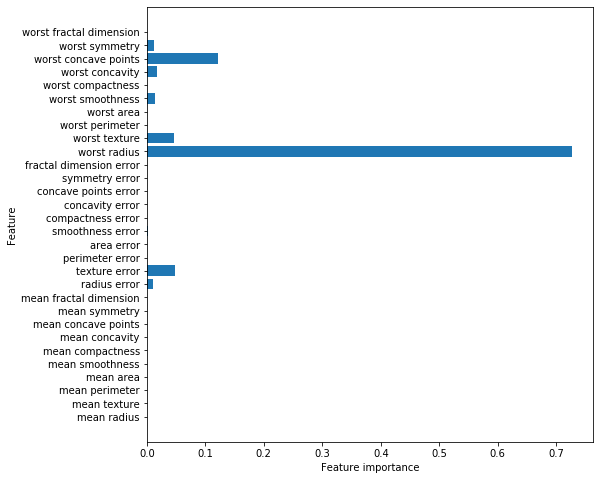

In [40]:
def plot_feature_importance_cancer(model):
    n_feat = cancer.data.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_feat),model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_feat),cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importance_cancer(tree)

In [61]:
pd.DataFrame(tree.feature_importances_,index = cancer.feature_names,columns = ['importance'])
# we can see 'worst radius' is the most important, but we don't know if the bigger the better, or vice-versa

,importance
mean radius,0.000000
mean texture,0.000000
mean perimeter,0.000000
mean area,0.000000
mean smoothness,0.000000
mean compactness,0.000000
mean concavity,0.000000
mean concave points,0.000000
mean symmetry,0.000000
mean fractal dimension,0.000000
